In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import osmnx as ox
ox.config(use_cache=True)

## Set the rectangular map boundries
This is an alternative to using osmnx to get the polygon of a geografic area. In this case it is roughly the frame covered by the cleaned Cabspotting dataset.

In [2]:
north, south, east, west = 38.04691, 37.276830000000004, -121.95391333333333, -122.62829

## Load the data and process it for plotting
Processing in this case means to drop the time and make x and y lists from longitude and latitude, respecitvely.

In [3]:
t = pickle.load(open('machine_learning/generated/citybased_rnn/test_00.pkl', 'rb'))

In [4]:
t

array([[ 3.24000000e+02, -1.22390083e+02,  3.77899094e+01],
       [-3.02492656e+04, -1.22387428e+02,  3.77959785e+01],
       [-5.41318281e+04, -1.22385445e+02,  3.78016281e+01],
       ...,
       [-1.29628850e+06, -1.22439728e+02,  3.76924286e+01],
       [-1.29628400e+06, -1.22439728e+02,  3.76924057e+01],
       [-1.29627975e+06, -1.22439728e+02,  3.76923828e+01]], dtype=float32)

In [5]:
lons = t[:, 1]
lats = t[:, 2]

## Get the street graph
Here, the graph is also projected to the correct UTM zone's map projection.

In [6]:
street_graph = ox.graph_from_bbox(north, south, east, west, retain_all=True, simplify=False)
street_graph = ox.project_graph(street_graph)

## Do the actual plotting

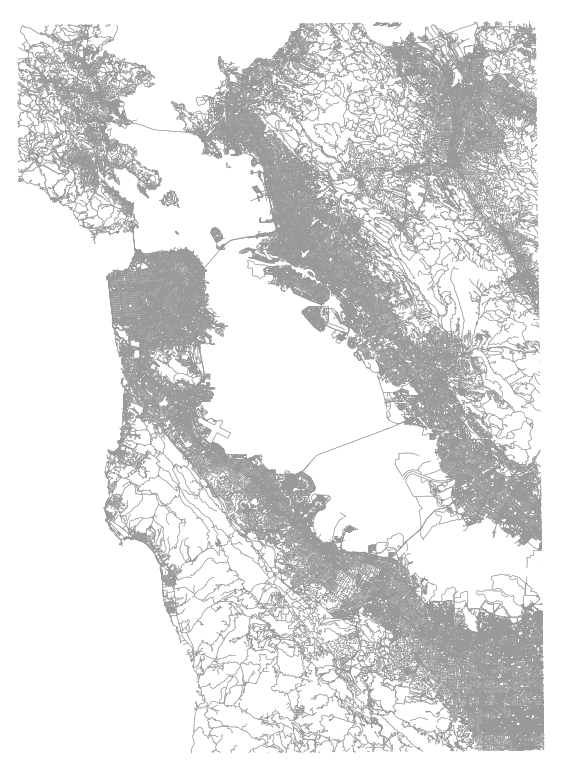

In [7]:
fig, ax = ox.plot_graph(street_graph, fig_height=14, node_size=0, edge_linewidth=0.5)
ax.plot(lons, lats, color='red', linewidth=0.5, marker=None, projection=ccrs)